## Airline Tweets Sentiment Analysis

**PURPOSE**: Use NLP to build a model to perform sentiment analysis on tweets for various US Airlines

**AUTHOR** : Maureen Wiebe

**DATA SOURCES**:<br> 
- Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
    
**REV DATE**: 6-21-2021

In [2]:
import pandas as pd 
import numpy as np 
import re
import string
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
pd.set_option('max_colwidth', 400)

In [3]:
tweets = pd.read_pickle('C:/Users/mwalz2/Documents/Python/Springboard/Airline_Tweets/data/interim/tweets.pkl')

### Overview of Dataset

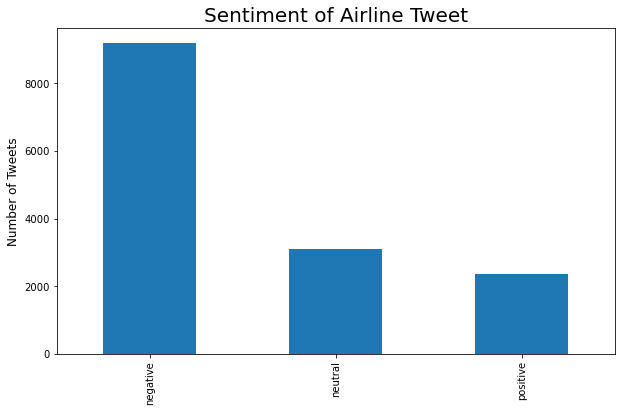

In [4]:
tweets.airline_sentiment.value_counts().plot(kind = 'bar', figsize =(10,6))
plt.ylabel('Number of Tweets', fontsize =12)
plt.title("Sentiment of Airline Tweet", fontsize = 20)
plt.show()

In [5]:
fig = px.bar(pd.DataFrame(tweets.groupby(['airline','airline_sentiment'],as_index = False).tweet_id.count()),x ='airline', y='tweet_id', color ='airline_sentiment', barmode ='stack',
       color_discrete_map ={'negative' :'rgb(214, 39, 40)', 'positive' :'rgb(44, 160, 44)', 'neutral' :'rgb(31, 119, 180)'},title ='Tweet Sentiment by Airline')
fig.update_layout(xaxis_title ='Airline', yaxis_title ='Number of Tweets')

In [46]:
airline_summary =pd.DataFrame(pd.DataFrame(tweets.groupby(['airline','airline_sentiment'],as_index = False).tweet_id.count()).pivot_table(index='airline', columns='airline_sentiment', values='tweet_id', aggfunc ='sum', margins =True).to_records())
airline_summary

airline  negative  neutral  positive    All
0        American      1960      463       336   2759
1           Delta       955      723       544   2222
2       Southwest      1186      664       570   2420
3      US Airways      2263      381       269   2913
4          United      2633      697       492   3822
5  Virgin America       181      171       152    504
6             All      9178     3099      2363  14640

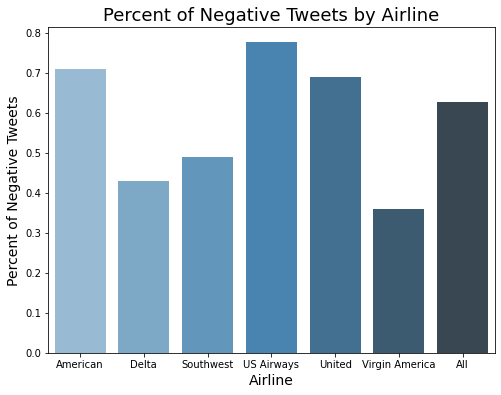

In [78]:
airline_summary['Neg_Perc'] = airline_summary['negative']/airline_summary['All']
plt.figure(figsize=(8,6))
fig =sns.barplot(data= airline_summary, x='airline',y='Neg_Perc',palette="Blues_d")
plt.title('Percent of Negative Tweets by Airline', fontsize =18)
plt.xlabel('Airline', fontsize =14)
plt.ylabel('Percent of Negative Tweets', fontsize =14)
plt.show()

### Positive Tweets

In [33]:
positive = tweets.loc[tweets.airline_sentiment =='positive','lemmatizied'].sum()

In [64]:
from nltk import FreqDist
frequency_dist = FreqDist(positive)
pd.DataFrame(frequency_dist.most_common(15), columns =['Word','Frequency'])

Word  Frequency
0     thanks        607
1      thank        453
2     flight        435
3      great        236
4    service        163
5          u        137
6       love        132
7   customer        123
8        guy        122
9        get        120
10        :)        109
11      good        109
12      much        109
13      time        107
14   airline        105

In [35]:
pos_words = [key for key, value in frequency_dist.items() if value >10]

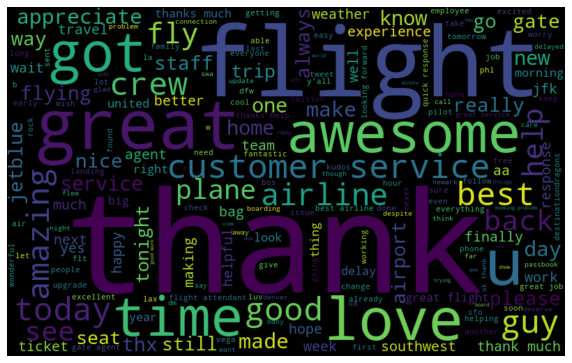

In [10]:
from wordcloud import WordCloud
wordcloud =WordCloud(width =800, height=500).generate_from_text(' '.join(positive))
plt.figure(figsize =(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Negative Tweets

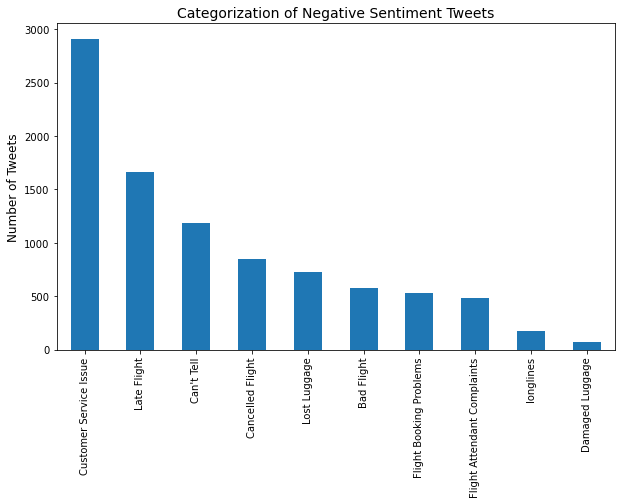

In [7]:
tweets[tweets.airline_sentiment =='negative'].negativereason.value_counts(dropna = False).plot(kind ='bar', figsize =(10,6))
plt.ylabel('Number of Tweets', fontsize =12)
plt.title("Categorization of Negative Sentiment Tweets", fontsize = 14)
plt.show()

In [30]:
negative = tweets.loc[tweets.airline_sentiment =='negative','lemmatizied'].sum()

In [62]:
frequency_dist = FreqDist(negative)
pd.DataFrame(frequency_dist.most_common(15), columns =['Word','Frequency'])

Word  Frequency
0      flight       3335
1        hour       1104
2         get       1016
3   cancelled        918
4    customer        773
5     service        765
6           u        757
7         ...        741
8        time        737
9         bag        662
10       hold        613
11       help        603
12      plane        589
13       call        506
14        i'm        499

In [32]:
neg_words = [key for key, value in frequency_dist.items() if value >10]

In [39]:
len(set(neg_words).difference(set(pos_words)))

894

In [41]:
set(pos_words).difference(set(neg_words))

{'#destinationdragons',
 ':-)',
 ';)',
 'beautiful',
 'btw',
 'definitely',
 'deserves',
 'enjoy',
 'excellent',
 'excited',
 'fantastic',
 'favorite',
 'haha',
 'keeping',
 'kudos',
 'loved',
 'lovely',
 'luv',
 'passbook',
 'prompt',
 'raise',
 'rock',
 'safely',
 'view',
 'warm',
 'welcome',
 'wonderful',
 '✌',
 '❤',
 '👌',
 '👍',
 '👏',
 '💙',
 '😉',
 '😊',
 '🙏'}

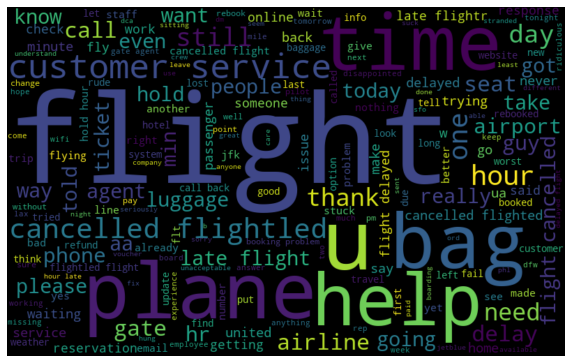

In [13]:
from wordcloud import WordCloud
wordcloud =WordCloud(width =800, height=500).generate_from_text(' '.join(negative))
plt.figure(figsize =(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Neutral Tweets

In [14]:
neutral = tweets.loc[tweets.airline_sentiment =='neutral','lemmatizied'].sum()

In [15]:
frequency_dist = FreqDist(neutral)
frequency_dist.most_common(10)

[('flight', 768),
 ('get', 241),
 ('need', 180),
 ('please', 180),
 ('...', 176),
 ('help', 164),
 ('thanks', 156),
 ('u', 152),
 ('dm', 123),
 ('would', 122)]

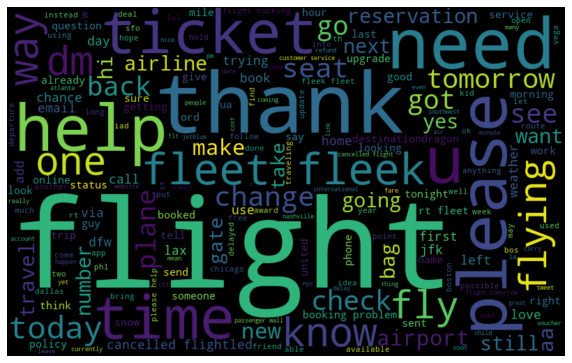

In [16]:
from wordcloud import WordCloud
wordcloud =WordCloud(width =800, height=500).generate_from_text(' '.join(neutral))
plt.figure(figsize =(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Tweet Properties

In [17]:
tweets.groupby('airline_sentiment').agg({"words":['mean','min','max','median']})

words               
                        mean min max median
airline_sentiment                          
negative           20.632709   1  39     22
neutral            14.830591   1  35     14
positive           15.026661   1  35     15

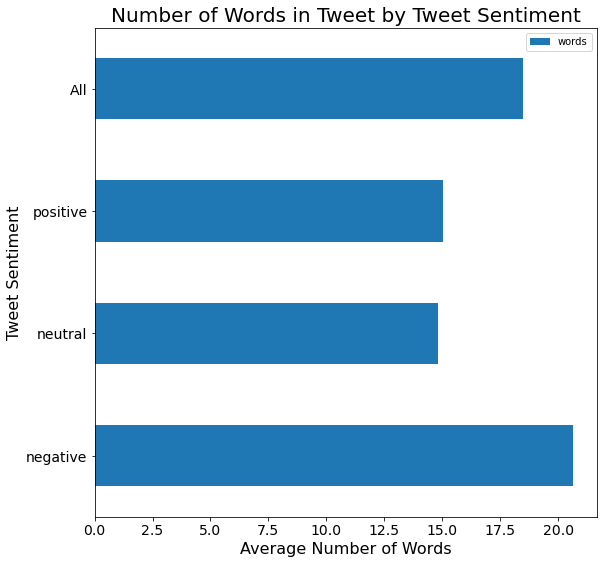

In [18]:
tweets.pivot_table(index ='airline_sentiment',values ='words', aggfunc ='mean', margins = True).plot(kind ='barh', figsize =(9,9))
plt.title("Number of Words in Tweet by Tweet Sentiment", fontsize = 20)
plt.xlabel("Average Number of Words", fontsize = 16)
plt.ylabel("Tweet Sentiment", fontsize = 16)
plt.xticks(fontsize =14 )
plt.yticks(fontsize =14 )
plt.show()

In [19]:
tweets['hashtag_cat']=0
tweets.loc[tweets.hashtag_count>0,'hashtag_cat']=1

In [20]:
hashtags = pd.DataFrame(tweets.pivot_table(index='airline_sentiment', columns ='hashtag_cat', values ='tweet_id',aggfunc ={'tweet_id':'count'}, margins =True).to_records())

hashtags['tweets_hash']=hashtags['1']/hashtags['All']

In [21]:
hashtags

airline_sentiment      0     1    All  tweets_hash
0          negative   7570  1608   9178     0.175202
1           neutral   2663   436   3099     0.140691
2          positive   1918   445   2363     0.188320
3               All  12151  2489  14640     0.170014

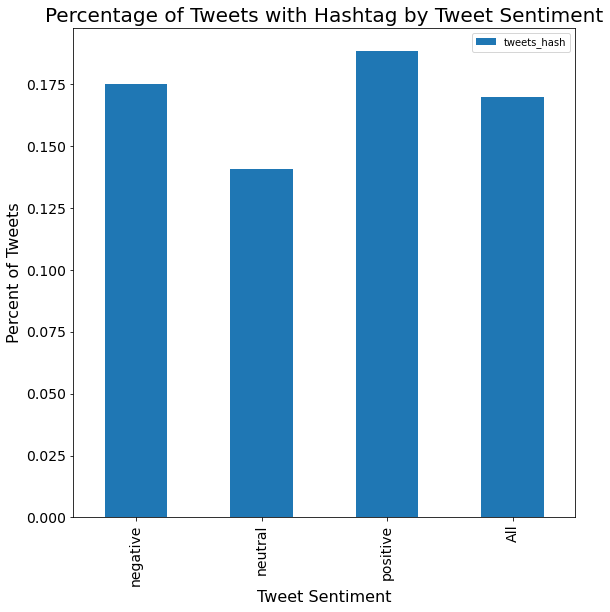

In [22]:
hashtags.plot(kind ='bar',x='airline_sentiment', y='tweets_hash',figsize =(9,9))
plt.title("Percentage of Tweets with Hashtag by Tweet Sentiment", fontsize = 20)
plt.ylabel("Percent of Tweets", fontsize = 16)
plt.xlabel("Tweet Sentiment", fontsize = 16)
plt.xticks(fontsize =14 )
plt.yticks(fontsize =14 )
plt.show()